In [1]:
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

# Hypothesis:  The features drive popularity of a track


I used the top200_global chart to test this Hypothesis  

A. Test track features vs. total number of streams using a heatmap

B. Test track features vs. popularity using chi2

In [14]:
data = pd.read_csv('charts_final\charts_top200_global.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,title,rank,date,artist_x,url,region,chart,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3432,3432,3432,Shape of You,1,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Global,top200,...,0.652,0.000000,1.0,0.0931,-3.183,0.0,0.0802,95.977,4.0,0.931
1,3433,3433,3433,Passionfruit,2,2017-04-01,Drake,https://open.spotify.com/track/7hDc8b7IXETo14h...,Global,top200,...,0.463,0.085000,11.0,0.1090,-11.377,1.0,0.0396,111.980,4.0,0.364
2,3434,3434,3434,It Ain't Me (with Selena Gomez),3,2017-04-01,Kygo,https://open.spotify.com/track/3eR23VReFzcdmS7...,Global,top200,...,0.533,0.000000,0.0,0.0864,-6.596,1.0,0.0706,99.968,4.0,0.515
3,3435,3435,3435,Something Just Like This,4,2017-04-01,"The Chainsmokers, Coldplay",https://open.spotify.com/track/6RUKPb4LETWmmr3...,Global,top200,...,0.635,0.000014,11.0,0.1640,-6.769,0.0,0.0317,103.019,4.0,0.446
4,3436,3436,3436,Despacito (Featuring Daddy Yankee),5,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Global,top200,...,0.786,0.000000,2.0,0.1120,-4.757,1.0,0.1700,177.833,4.0,0.846


In [15]:
data.isnull().sum(axis = 0)

Unnamed: 0          0
Unnamed: 0.1        0
Unnamed: 0.1.1      0
title               0
rank                0
date                0
artist_x            0
url                 0
region              0
chart               0
streams             0
genre               0
track_id            0
id                  0
album               9
duration_ms         0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [12]:
data.columns

Index(['title', 'rank', 'date', 'artist_x', 'url', 'region', 'chart',
       'streams', 'genre', 'track_id', 'id', 'album', 'duration_ms',
       'release_date', 'length', 'popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [8]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis =1)

In [6]:
data_check = data[['artist_x','popularity']]

In [7]:
data_check[data_check['artist_x']=="Ed Sheeran"]

,artist_x,popularity
0,Ed Sheeran,85.0
8,Ed Sheeran,77.0
20,Ed Sheeran,77.0
32,Ed Sheeran,85.0
42,Ed Sheeran,80.0
...,...,...
339709,Ed Sheeran,85.0
339712,Ed Sheeran,85.0
339784,Ed Sheeran,97.0
339908,Ed Sheeran,85.0


In [194]:
data['streams']

0         6815498.0
1         4235699.0
2         4102670.0
3         3890316.0
4         3456893.0
            ...    
339977     755325.0
339978     755227.0
339979     751442.0
339980     751286.0
339981     751214.0
Name: streams, Length: 339982, dtype: float64

In [13]:
data_for_h = data.groupby(['track_id']).agg({'title': max, 'rank': max, 'date': max,
       'artist_x': max, 'url': max, 'region': max, 'chart': max, 'streams':sum, 'genre': max,
       'id': 'count', 'album': max, 'duration_ms':np.average, 'release_date': max, 'length': max, 'popularity': np.average,
       'acousticness': max, 'danceability': max, 'energy': max, 'instrumentalness': max, 'key': max,
       'liveness': max, 'loudness': max, 'mode': max, 'speechiness': max, 'tempo': max,
       'time_signature': max, 'valence': max}).reset_index()                                                                      
                                   

In [17]:
data_for_h['streams']

0       104141294.0
1         1730738.0
2         9809956.0
3       135999390.0
4        11882167.0
           ...     
7069     14779959.0
7070     16750578.0
7071      3524254.0
7072       815960.0
7073      6415060.0
Name: streams, Length: 7074, dtype: float64

# A. Test track features vs. total number of streams using a heatmap

In [18]:
# Based on total of streams:

data_for_heatmap = data_for_h[['streams','danceability','valence', 'energy',
    'tempo',                            
 'loudness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'acousticness','duration_ms'
 ]]

data_for_heatmap.head()

,streams,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,duration_ms
0,104141294.0,0.748,0.524,0.627,120.963,-6.029,0.0639,0.0,0.0852,0.13100,188491.0
1,1730738.0,0.842,0.190,0.578,74.496,-6.050,0.1380,0.0,0.2280,0.00419,236779.0
2,9809956.0,0.353,0.437,0.755,191.153,-6.276,0.7330,0.0,0.3900,0.08220,193680.0
3,135999390.0,0.352,0.236,0.911,148.033,-5.230,0.0747,0.0,0.0995,0.00121,222973.0
4,11882167.0,0.620,0.665,0.625,167.911,-7.438,0.5530,0.0,0.3140,0.28700,284856.0


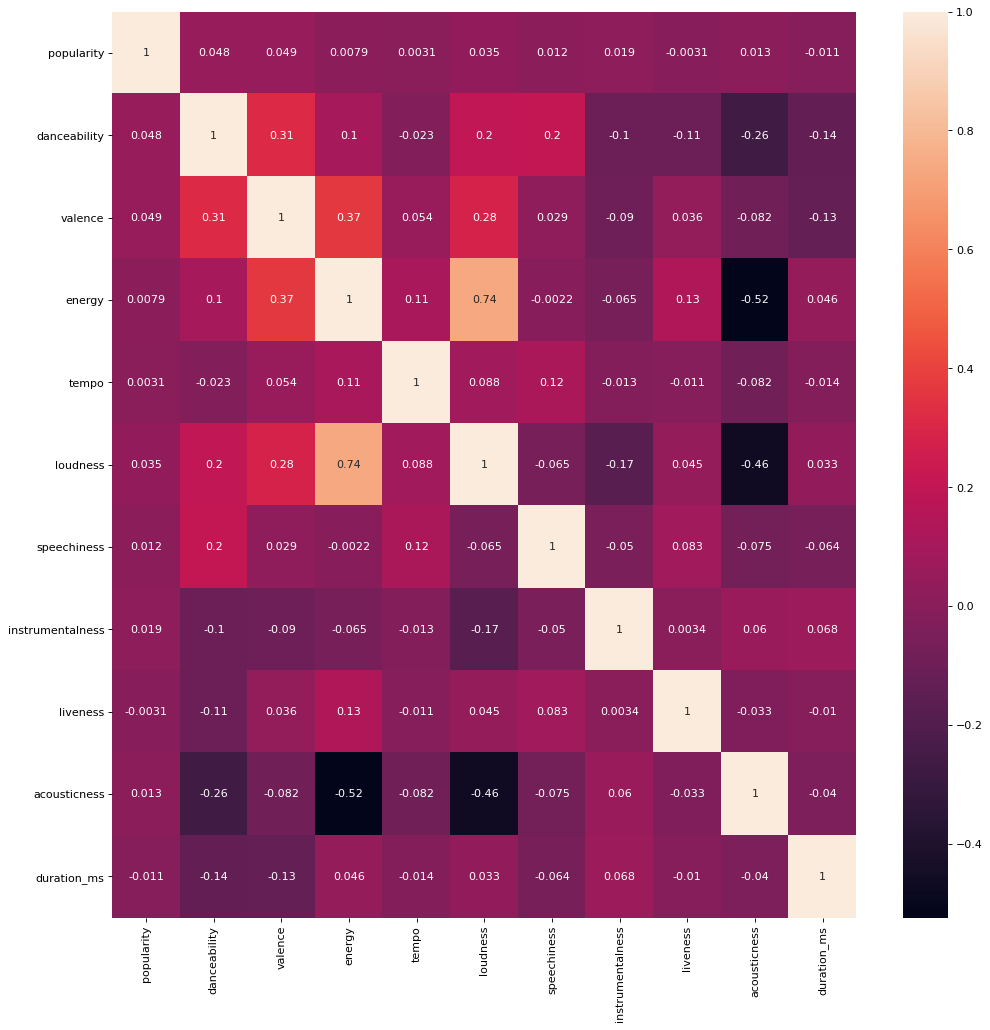

In [38]:
# figure(figsize=(15, 15), dpi=80)
# correlations_matrix = data_for_heatmap.corr()
# sns.heatmap(correlations_matrix, annot=True)
# plt.show()


# # No high correlations with streams were noted

# B. Test track features vs. popularity using chi2


In [113]:
# NO strong evidence to support that the variables are related / not independent

no_strong_evidence = {'tempo':  0.9998746383604737, 'speechiness': 0.9999999999997923, 'liveness':0.11707128149185499}
no_strong_evidence = pd.DataFrame(list(no_strong_evidence.items()))
no_strong_evidence 

,0,1
0,tempo,0.999875
1,speechiness,1.000000
2,liveness,0.117071


In [111]:
# Strong evidence that the variables are related / not independent

strong_evidence = {'danceability': 3.605096953516772e-34, 'valence': 0.013737080726017406, 
                   'energy': 7.327266563777908e-208, 'loudness':  1.638659839347892e-47, 'instrumentalness': 4.498933981127274e-77,
                  'acousticness': 6.2465515162764355e-118,'key': 0.005650863215149636, 'mode': 0.024039227558581268,
                  'time_signature': 0.0016765184674517523, 'duration_ms':0.0001061253499566325}
strong_evidence = pd.DataFrame(list(strong_evidence.items()))
strong_evidence
# results = pd.DataFrame(list(cross_tab (data_test,'popularity').items()))

,0,1
0,danceability,3.605097e-34
1,valence,1.373708e-02
2,energy,7.327267e-208
3,loudness,1.638660e-47
4,instrumentalness,4.498934e-77
5,acousticness,6.246552e-118
6,key,5.650863e-03
7,mode,2.403923e-02
8,time_signature,1.676518e-03
9,duration_ms,1.061253e-04


In [138]:
results = pd.concat([strong_evidence, no_strong_evidence], axis=0).reset_index()
results

,index,0,1
0,0,danceability,3.605097e-34
1,1,valence,1.373708e-02
2,2,energy,7.327267e-208
3,3,loudness,1.638660e-47
4,4,instrumentalness,4.498934e-77
5,5,acousticness,6.246552e-118
6,6,key,5.650863e-03
7,7,mode,2.403923e-02
8,8,time_signature,1.676518e-03
9,9,duration_ms,1.061253e-04


In [139]:
# results['No strong evidence'] = results[results[1] >= 0.05]

results['Conclusion'] = results[1]>=0.05
results

,index,0,1,Conclusion
0,0,danceability,3.605097e-34,False
1,1,valence,1.373708e-02,False
2,2,energy,7.327267e-208,False
3,3,loudness,1.638660e-47,False
4,4,instrumentalness,4.498934e-77,False
5,5,acousticness,6.246552e-118,False
6,6,key,5.650863e-03,False
7,7,mode,2.403923e-02,False
8,8,time_signature,1.676518e-03,False
9,9,duration_ms,1.061253e-04,False


In [140]:
conditions = [
    (results[1] >= 0.05),
    (results[1] < 0.05),
    ]

# create a list of the values we want to assign for each condition
values = ['no strong evidence', 'strong evidence']

# create a new column and use np.select to assign values to it using our lists as arguments
results['Conclusion'] = np.select(conditions, values)
results

,index,0,1,Conclusion
0,0,danceability,3.605097e-34,strong evidence
1,1,valence,1.373708e-02,strong evidence
2,2,energy,7.327267e-208,strong evidence
3,3,loudness,1.638660e-47,strong evidence
4,4,instrumentalness,4.498934e-77,strong evidence
5,5,acousticness,6.246552e-118,strong evidence
6,6,key,5.650863e-03,strong evidence
7,7,mode,2.403923e-02,strong evidence
8,8,time_signature,1.676518e-03,strong evidence
9,9,duration_ms,1.061253e-04,strong evidence


In [141]:
results = results.drop(['index'], axis = 1)
results

,0,1,Conclusion
0,danceability,3.605097e-34,strong evidence
1,valence,1.373708e-02,strong evidence
2,energy,7.327267e-208,strong evidence
3,loudness,1.638660e-47,strong evidence
4,instrumentalness,4.498934e-77,strong evidence
5,acousticness,6.246552e-118,strong evidence
6,key,5.650863e-03,strong evidence
7,mode,2.403923e-02,strong evidence
8,time_signature,1.676518e-03,strong evidence
9,duration_ms,1.061253e-04,strong evidence


In [144]:
results = results.rename(columns={0:'Feature',
                            1:'Chi2 result'
                            })

In [148]:
results['Chi2 result'] = results['Chi2 result'].round(decimals = 2)
results

,Feature,Chi2 result,Conclusion
0,danceability,0.00,strong evidence
1,valence,0.01,strong evidence
2,energy,0.00,strong evidence
3,loudness,0.00,strong evidence
4,instrumentalness,0.00,strong evidence
5,acousticness,0.00,strong evidence
6,key,0.01,strong evidence
7,mode,0.02,strong evidence
8,time_signature,0.00,strong evidence
9,duration_ms,0.00,strong evidence


In [149]:
results.to_csv('results.csv')

# Calculating chi2>>>

In [ ]:
# Mood:

In [98]:
data_crosstab = pd.crosstab(data_for_h['popularity'],data_for_h['danceability'], margins = False)
st.chi2_contingency(data_crosstab)

(75316.34164634127,
 3.605096953516772e-34,
 70658,
 array([[1.65535765e-01, 1.65535765e-01, 1.65535765e-01, ...,
         1.65535765e-01, 1.65535765e-01, 1.65535765e-01],
        [1.71048912e-02, 1.71048912e-02, 1.71048912e-02, ...,
         1.71048912e-02, 1.71048912e-02, 1.71048912e-02],
        [6.92677410e-03, 6.92677410e-03, 6.92677410e-03, ...,
         6.92677410e-03, 6.92677410e-03, 6.92677410e-03],
        ...,
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [1.41362737e-04, 1.41362737e-04, 1.41362737e-04, ...,
         1.41362737e-04, 1.41362737e-04, 1.41362737e-04]]))

In [99]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['valence'], margins = False)
st.chi2_contingency(data_crosstab)

(103607.31547992943,
 0.013737080726017406,
 102606,
 array([[1.65535765e-01, 3.31071530e-01, 1.65535765e-01, ...,
         1.65535765e-01, 1.65535765e-01, 1.65535765e-01],
        [1.71048912e-02, 3.42097823e-02, 1.71048912e-02, ...,
         1.71048912e-02, 1.71048912e-02, 1.71048912e-02],
        [6.92677410e-03, 1.38535482e-02, 6.92677410e-03, ...,
         6.92677410e-03, 6.92677410e-03, 6.92677410e-03],
        ...,
        [2.82725474e-04, 5.65450947e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [2.82725474e-04, 5.65450947e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [1.41362737e-04, 2.82725474e-04, 1.41362737e-04, ...,
         1.41362737e-04, 1.41362737e-04, 1.41362737e-04]]))

In [100]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['energy'], margins = False)
st.chi2_contingency(data_crosstab)

(94588.38598744059,
 7.327266563777908e-208,
 81536,
 array([[1.65535765e-01, 1.65535765e-01, 3.31071530e-01, ...,
         1.65535765e-01, 1.65535765e-01, 3.31071530e-01],
        [1.71048912e-02, 1.71048912e-02, 3.42097823e-02, ...,
         1.71048912e-02, 1.71048912e-02, 3.42097823e-02],
        [6.92677410e-03, 6.92677410e-03, 1.38535482e-02, ...,
         6.92677410e-03, 6.92677410e-03, 1.38535482e-02],
        ...,
        [2.82725474e-04, 2.82725474e-04, 5.65450947e-04, ...,
         2.82725474e-04, 2.82725474e-04, 5.65450947e-04],
        [2.82725474e-04, 2.82725474e-04, 5.65450947e-04, ...,
         2.82725474e-04, 2.82725474e-04, 5.65450947e-04],
        [1.41362737e-04, 1.41362737e-04, 2.82725474e-04, ...,
         1.41362737e-04, 1.41362737e-04, 2.82725474e-04]]))

In [101]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['tempo'], margins = False)
st.chi2_contingency(data_crosstab)

(564308.9990723578,
 0.9998746383604737,
 568204,
 array([[1.65535765e-01, 1.65535765e-01, 1.65535765e-01, ...,
         1.65535765e-01, 1.65535765e-01, 1.65535765e-01],
        [1.71048912e-02, 1.71048912e-02, 1.71048912e-02, ...,
         1.71048912e-02, 1.71048912e-02, 1.71048912e-02],
        [6.92677410e-03, 6.92677410e-03, 6.92677410e-03, ...,
         6.92677410e-03, 6.92677410e-03, 6.92677410e-03],
        ...,
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [1.41362737e-04, 1.41362737e-04, 1.41362737e-04, ...,
         1.41362737e-04, 1.41362737e-04, 1.41362737e-04]]))

In [ ]:
# Properties:

In [102]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['loudness'], margins = False)
st.chi2_contingency(data_crosstab)

(454691.8715328657,
 1.638659839347892e-47,
 441000,
 array([[1.65535765e-01, 1.65535765e-01, 1.65535765e-01, ...,
         1.65535765e-01, 1.65535765e-01, 3.31071530e-01],
        [1.71048912e-02, 1.71048912e-02, 1.71048912e-02, ...,
         1.71048912e-02, 1.71048912e-02, 3.42097823e-02],
        [6.92677410e-03, 6.92677410e-03, 6.92677410e-03, ...,
         6.92677410e-03, 6.92677410e-03, 1.38535482e-02],
        ...,
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 5.65450947e-04],
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 5.65450947e-04],
        [1.41362737e-04, 1.41362737e-04, 1.41362737e-04, ...,
         1.41362737e-04, 1.41362737e-04, 2.82725474e-04]]))

In [103]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['speechiness'], margins = False)
st.chi2_contingency(data_crosstab)

(111511.81424743215,
 0.9999999999997923,
 114954,
 array([[1.65535765e-01, 1.65535765e-01, 1.65535765e-01, ...,
         1.65535765e-01, 1.65535765e-01, 1.65535765e-01],
        [1.71048912e-02, 1.71048912e-02, 1.71048912e-02, ...,
         1.71048912e-02, 1.71048912e-02, 1.71048912e-02],
        [6.92677410e-03, 6.92677410e-03, 6.92677410e-03, ...,
         6.92677410e-03, 6.92677410e-03, 6.92677410e-03],
        ...,
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [1.41362737e-04, 1.41362737e-04, 1.41362737e-04, ...,
         1.41362737e-04, 1.41362737e-04, 1.41362737e-04]]))

In [104]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['instrumentalness'], margins = False)
st.chi2_contingency(data_crosstab)

(196938.7192899187,
 4.498933981127274e-77,
 185416,
 array([[6.71413062e+02, 1.65535765e-01, 3.31071530e-01, ...,
         3.31071530e-01, 1.65535765e-01, 1.65535765e-01],
        [6.93774385e+01, 1.71048912e-02, 3.42097823e-02, ...,
         3.42097823e-02, 1.71048912e-02, 1.71048912e-02],
        [2.80949958e+01, 6.92677410e-03, 1.38535482e-02, ...,
         1.38535482e-02, 6.92677410e-03, 6.92677410e-03],
        ...,
        [1.14673452e+00, 2.82725474e-04, 5.65450947e-04, ...,
         5.65450947e-04, 2.82725474e-04, 2.82725474e-04],
        [1.14673452e+00, 2.82725474e-04, 5.65450947e-04, ...,
         5.65450947e-04, 2.82725474e-04, 2.82725474e-04],
        [5.73367260e-01, 1.41362737e-04, 2.82725474e-04, ...,
         2.82725474e-04, 1.41362737e-04, 1.41362737e-04]]))

In [96]:
# Context:

In [105]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['liveness'], margins = False)
st.chi2_contingency(data_crosstab)

(108942.2161142272,
 0.11707128149185499,
 108388,
 array([[1.65535765e-01, 1.65535765e-01, 3.31071530e-01, ...,
         1.65535765e-01, 1.65535765e-01, 1.65535765e-01],
        [1.71048912e-02, 1.71048912e-02, 3.42097823e-02, ...,
         1.71048912e-02, 1.71048912e-02, 1.71048912e-02],
        [6.92677410e-03, 6.92677410e-03, 1.38535482e-02, ...,
         6.92677410e-03, 6.92677410e-03, 6.92677410e-03],
        ...,
        [2.82725474e-04, 2.82725474e-04, 5.65450947e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [2.82725474e-04, 2.82725474e-04, 5.65450947e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [1.41362737e-04, 1.41362737e-04, 2.82725474e-04, ...,
         1.41362737e-04, 1.41362737e-04, 1.41362737e-04]]))

In [106]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['acousticness'], margins = False)
st.chi2_contingency(data_crosstab)

(222166.5324989307,
 6.2465515162764355e-118,
 206976,
 array([[1.65535765e-01, 1.65535765e-01, 1.65535765e-01, ...,
         1.65535765e-01, 1.65535765e-01, 1.65535765e-01],
        [1.71048912e-02, 1.71048912e-02, 1.71048912e-02, ...,
         1.71048912e-02, 1.71048912e-02, 1.71048912e-02],
        [6.92677410e-03, 6.92677410e-03, 6.92677410e-03, ...,
         6.92677410e-03, 6.92677410e-03, 6.92677410e-03],
        ...,
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [2.82725474e-04, 2.82725474e-04, 2.82725474e-04, ...,
         2.82725474e-04, 2.82725474e-04, 2.82725474e-04],
        [1.41362737e-04, 1.41362737e-04, 1.41362737e-04, ...,
         1.41362737e-04, 1.41362737e-04, 1.41362737e-04]]))

In [ ]:
# Other features:

In [107]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['key'], margins = False)
st.chi2_contingency(data_crosstab)

(1199.2320393343439,
 0.005650863215149636,
 1078,
 array([[1.26303789e+02, 1.74474696e+02, 9.58452078e+01, ...,
         9.35277071e+01, 8.49198473e+01, 1.01473424e+02],
        [1.30510319e+01, 1.80285553e+01, 9.90373198e+00, ...,
         9.66426350e+00, 8.77480916e+00, 1.04852983e+01],
        [5.28512864e+00, 7.30081990e+00, 4.01060221e+00, ...,
         3.91362737e+00, 3.55343511e+00, 4.24611252e+00],
        ...,
        [2.15719536e-01, 2.97992649e-01, 1.63698049e-01, ...,
         1.59739893e-01, 1.45038168e-01, 1.73310715e-01],
        [2.15719536e-01, 2.97992649e-01, 1.63698049e-01, ...,
         1.59739893e-01, 1.45038168e-01, 1.73310715e-01],
        [1.07859768e-01, 1.48996325e-01, 8.18490246e-02, ...,
         7.98699463e-02, 7.25190840e-02, 8.66553576e-02]]))

In [108]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['mode'], margins = False)
st.chi2_contingency(data_crosstab)

(127.56039244728257,
 0.024039227558581268,
 98,
 array([[4.92137829e+02, 6.78862171e+02],
        [5.08528414e+01, 7.01471586e+01],
        [2.05932994e+01, 2.84067006e+01],
        [1.21878711e+01, 1.68121289e+01],
        [5.88379983e+00, 8.11620017e+00],
        [5.46352841e+00, 7.53647159e+00],
        [3.78244275e+00, 5.21755725e+00],
        [3.36217133e+00, 4.63782867e+00],
        [3.78244275e+00, 5.21755725e+00],
        [5.88379983e+00, 8.11620017e+00],
        [2.52162850e+00, 3.47837150e+00],
        [2.94189992e+00, 4.05810008e+00],
        [2.94189992e+00, 4.05810008e+00],
        [1.68108567e+00, 2.31891433e+00],
        [1.26081425e+00, 1.73918575e+00],
        [8.40542833e-01, 1.15945717e+00],
        [1.68108567e+00, 2.31891433e+00],
        [3.36217133e+00, 4.63782867e+00],
        [3.36217133e+00, 4.63782867e+00],
        [2.94189992e+00, 4.05810008e+00],
        [2.10135708e+00, 2.89864292e+00],
        [3.78244275e+00, 5.21755725e+00],
        [2.94189992e+00, 4.

In [109]:
data_crosstab = pd.crosstab(data_for_h['popularity'], data_for_h['time_signature'], margins = False)
st.chi2_contingency(data_crosstab)

(370.2175175863867,
 0.0016765184674517523,
 294,
 array([[5.62821600e+00, 4.58534068e+01, 1.09882641e+03, 2.06919706e+01],
        [5.81566299e-01, 4.73805485e+00, 1.13542267e+02, 2.13811139e+00],
        [2.35510319e-01, 1.91871643e+00, 4.59799265e+01, 8.65846763e-01],
        [1.39383658e-01, 1.13556686e+00, 2.72126096e+01, 5.12439921e-01],
        [6.72886627e-02, 5.48204693e-01, 1.31371219e+01, 2.47384789e-01],
        [6.24823297e-02, 5.09047215e-01, 1.21987560e+01, 2.29714447e-01],
        [4.32569975e-02, 3.52417303e-01, 8.44529262e+00, 1.59033079e-01],
        [3.84506644e-02, 3.13259825e-01, 7.50692677e+00, 1.41362737e-01],
        [4.32569975e-02, 3.52417303e-01, 8.44529262e+00, 1.59033079e-01],
        [6.72886627e-02, 5.48204693e-01, 1.31371219e+01, 2.47384789e-01],
        [2.88379983e-02, 2.34944869e-01, 5.63019508e+00, 1.06022053e-01],
        [3.36443314e-02, 2.74102347e-01, 6.56856093e+00, 1.23692395e-01],
        [3.36443314e-02, 2.74102347e-01, 6.56856093e+00, 1.236